# Univariate without exogeneous

In [ ]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [ ]:
def what_is_installed():
    from pycaret import show_versions
    show_versions()

try:
    what_is_installed()
except ModuleNotFoundError:
    !pip install pycaret
    what_is_installed()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
import time
import numpy as np
import pandas as pd

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [ ]:
y = get_data('airline', verbose=False)

In [ ]:
fh = 12
fold = 3

In [ ]:
fig_kwargs = {
    # "renderer": "notebook",
    "renderer": "png",
    "width": 1000,
    "height": 600,
}

# Exploratory Analysis

In [ ]:
eda = TSForecastingExperiment()
eda.setup(data=y, fh=fh, fig_kwargs=fig_kwargs)

,Description,Value
0,session_id,6573
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


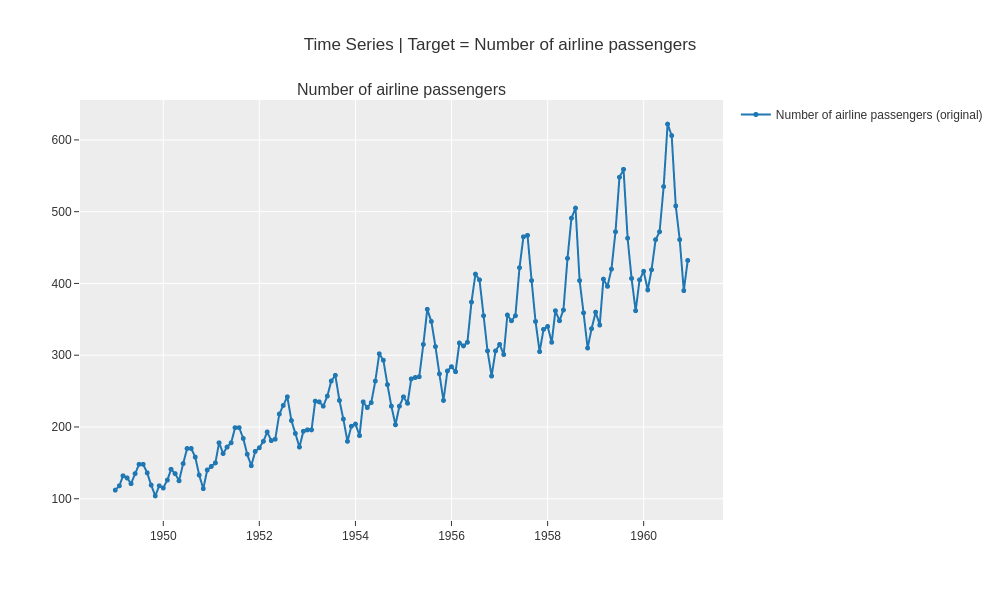

In [ ]:
eda.plot_model()

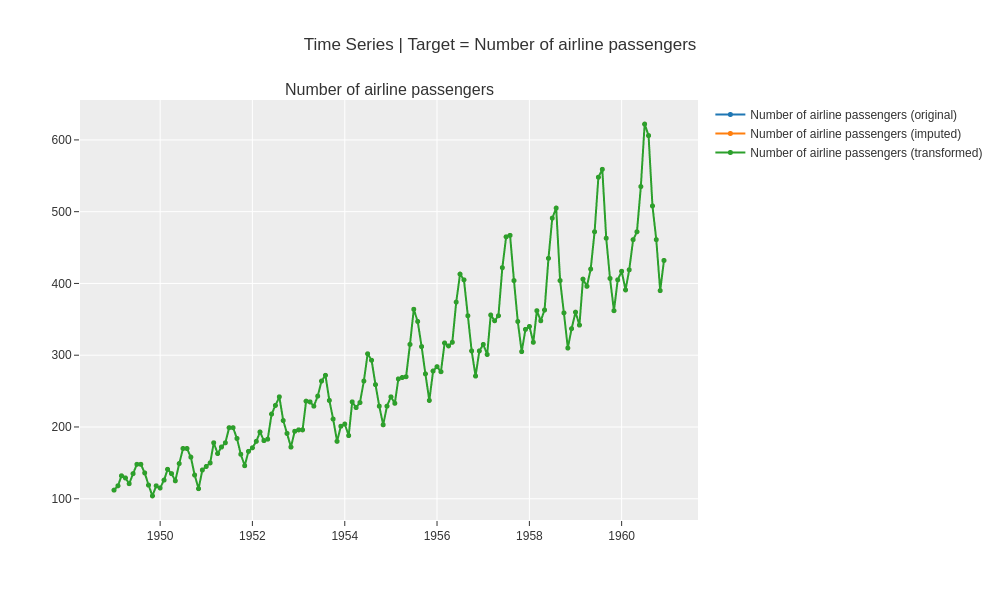

In [ ]:
eda.plot_model(data_kwargs={"plot_data_type": ["original", "imputed", "transformed"]})

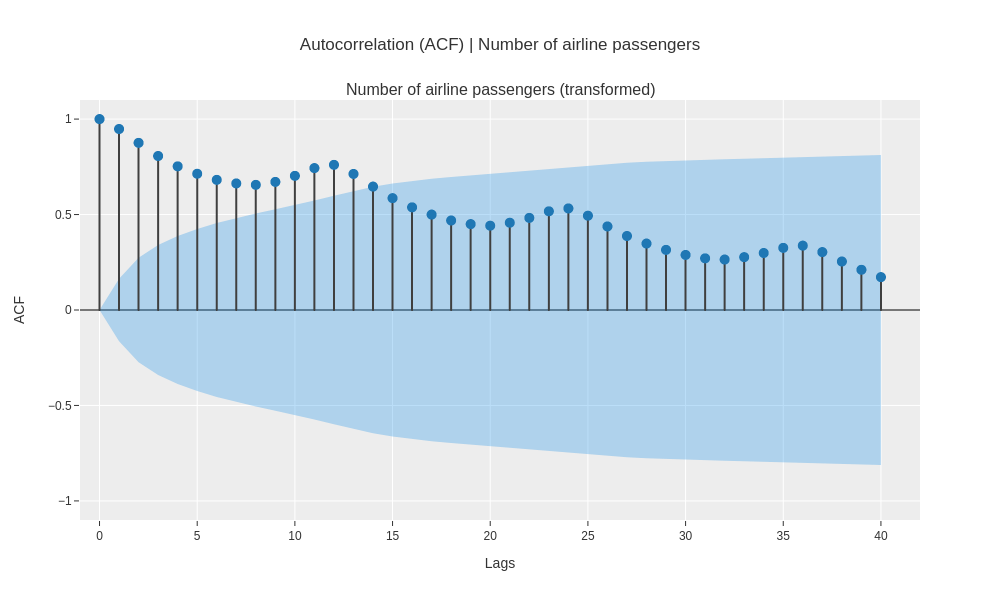

In [ ]:
eda.plot_model(plot="acf")

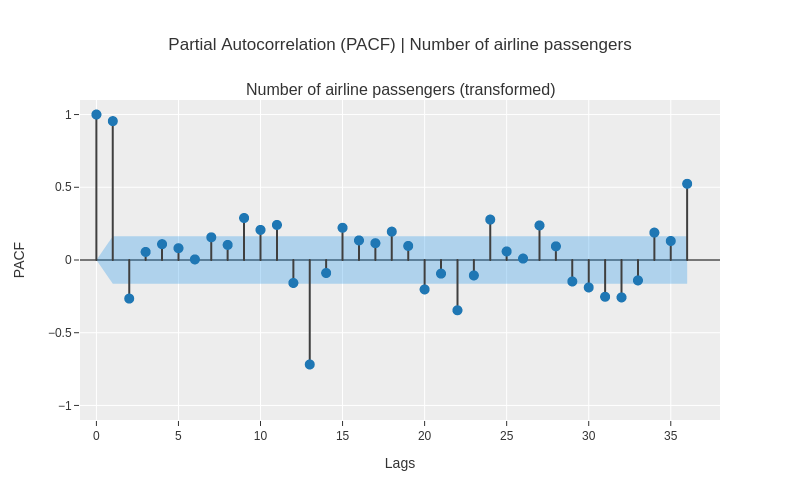

In [ ]:
eda.plot_model(plot="pacf", data_kwargs={'nlags':36}, fig_kwargs={'height': 500, "width": 800})

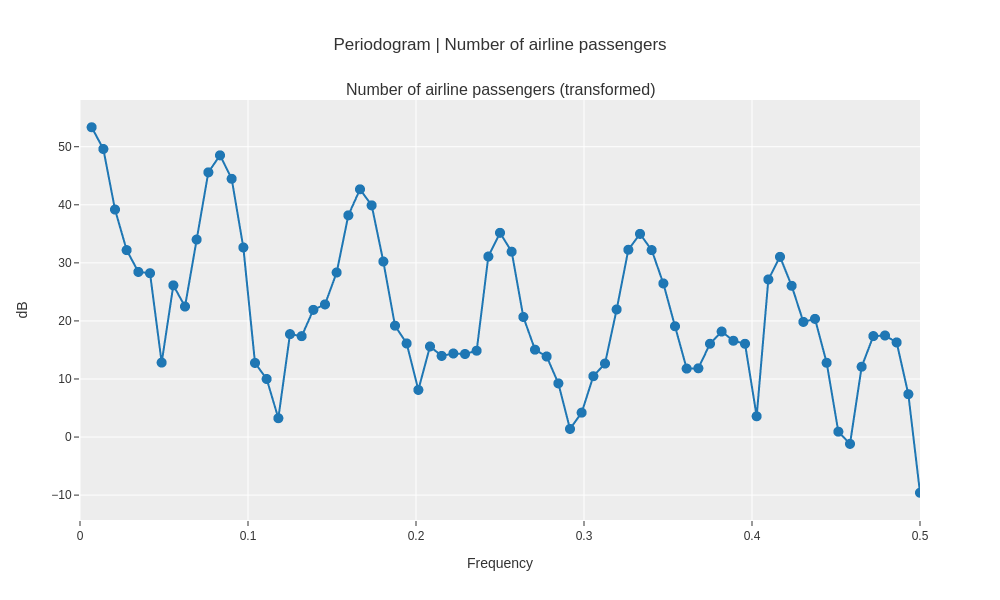

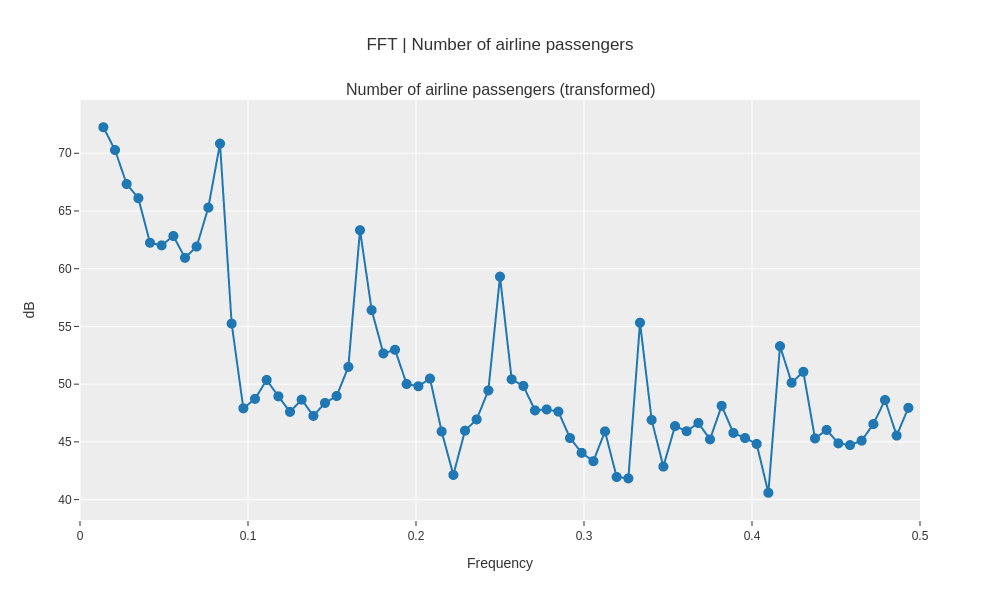

In [ ]:
eda.plot_model(plot="periodogram")
eda.plot_model(plot="fft")

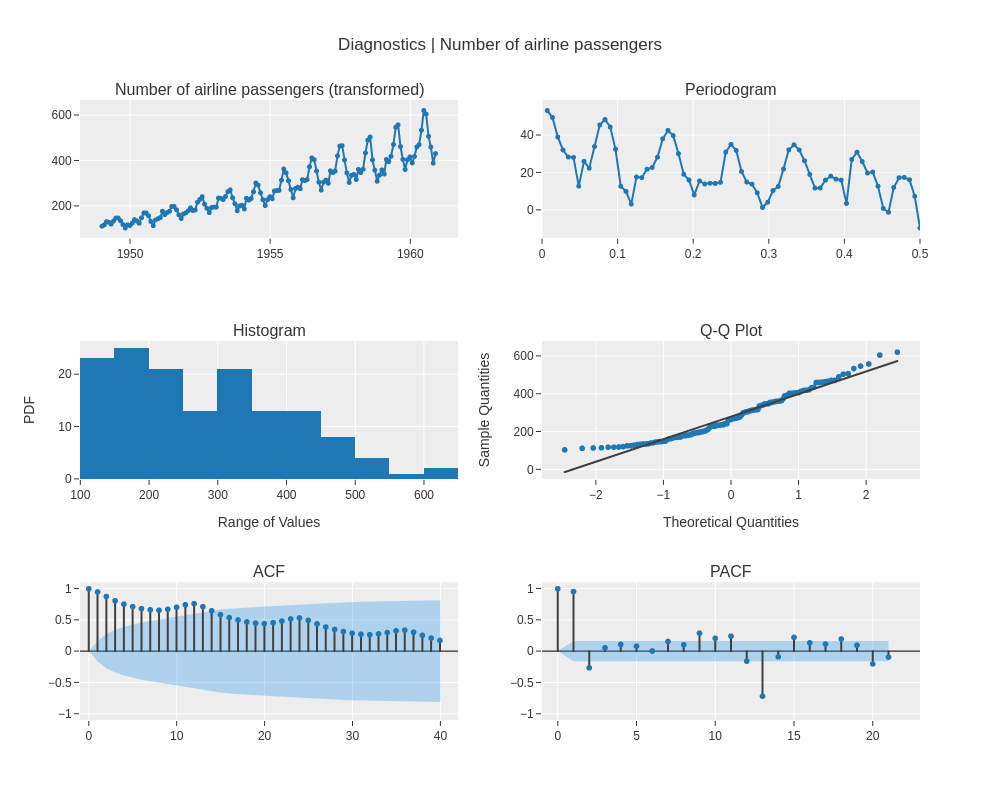

In [ ]:
eda.plot_model(plot="diagnostics", fig_kwargs={"height": 800, "width": 1000})

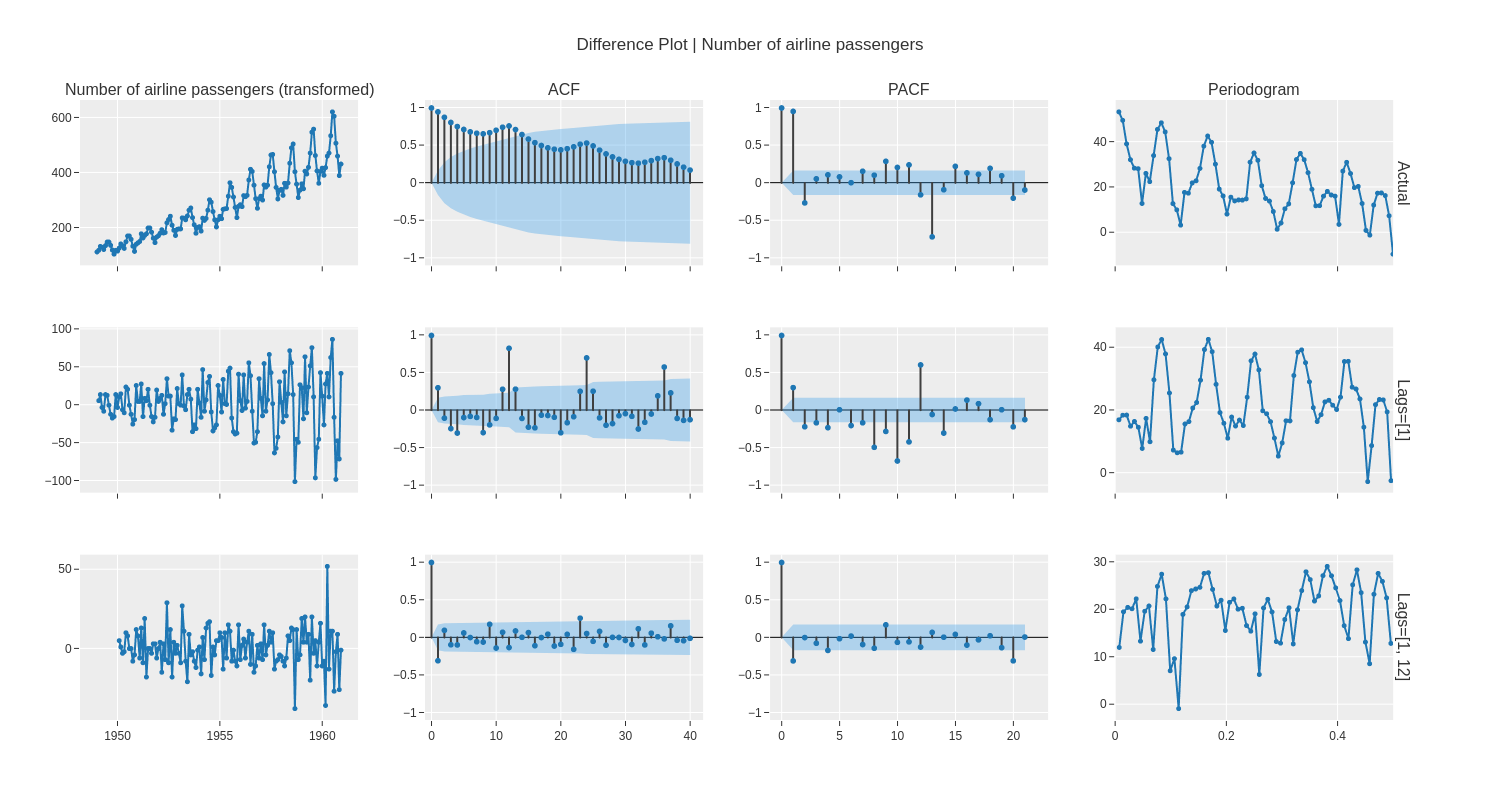

In [ ]:
eda.plot_model(
    plot="diff",
    data_kwargs={"lags_list": [[1], [1, 12]], "acf": True, "pacf": True, "periodogram": True},
    fig_kwargs={"height": 800, "width": 1500}
)

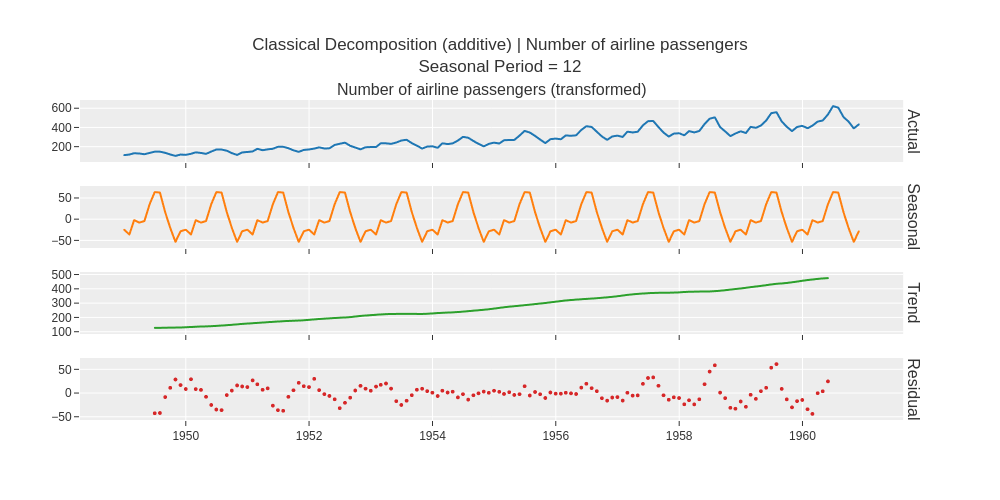

In [ ]:
eda.plot_model(plot="decomp", fig_kwargs={"height": 500})

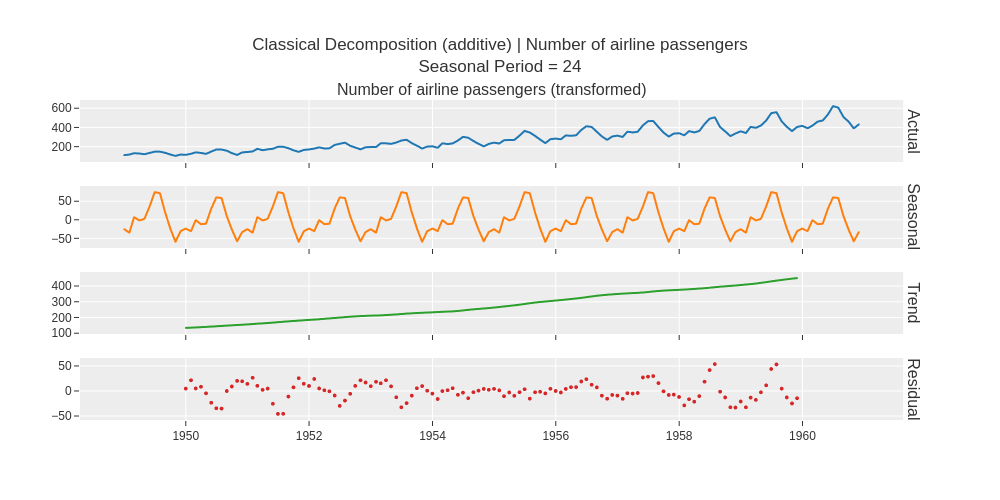

In [ ]:
eda.plot_model(plot="decomp", data_kwargs={'seasonal_period': 24}, fig_kwargs={"height": 500})

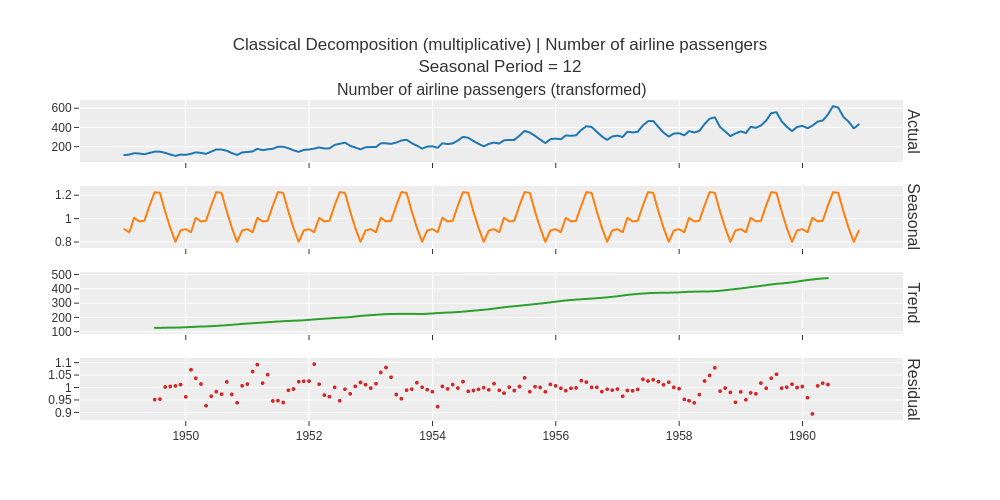

In [ ]:
eda.plot_model(plot="decomp", data_kwargs={'type': 'multiplicative'}, fig_kwargs={"height": 500})

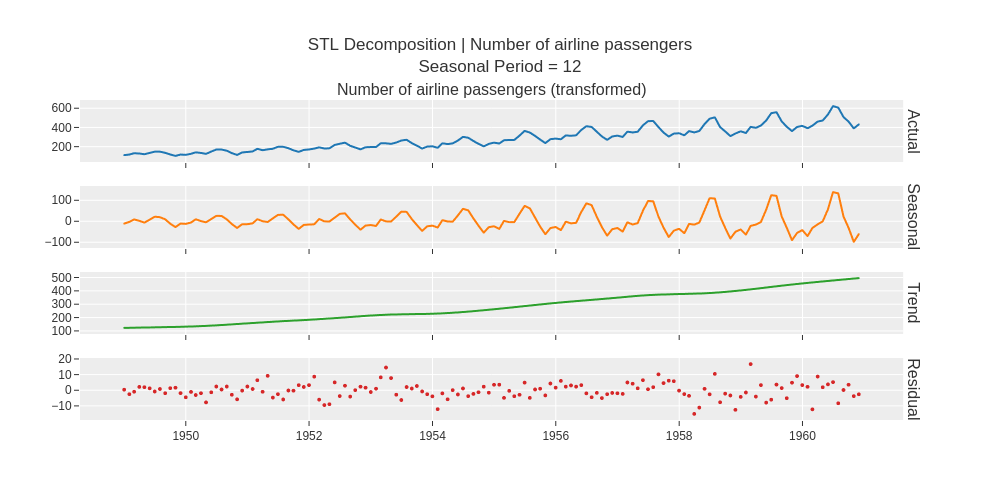

In [ ]:
eda.plot_model(plot="decomp_stl", fig_kwargs={"height": 500})

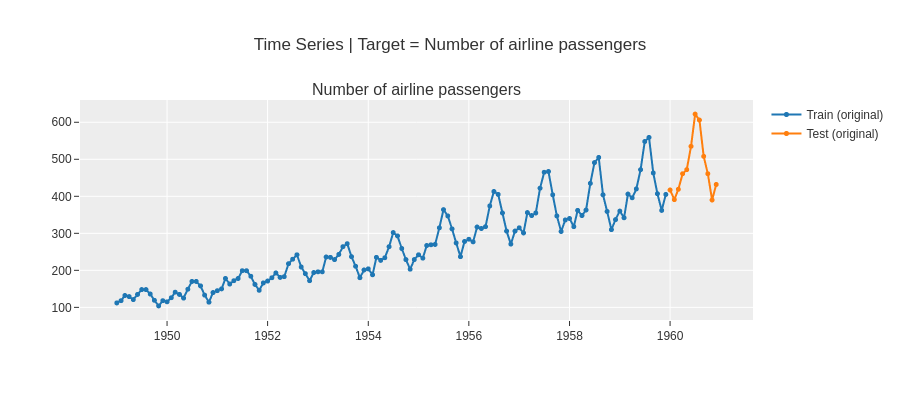

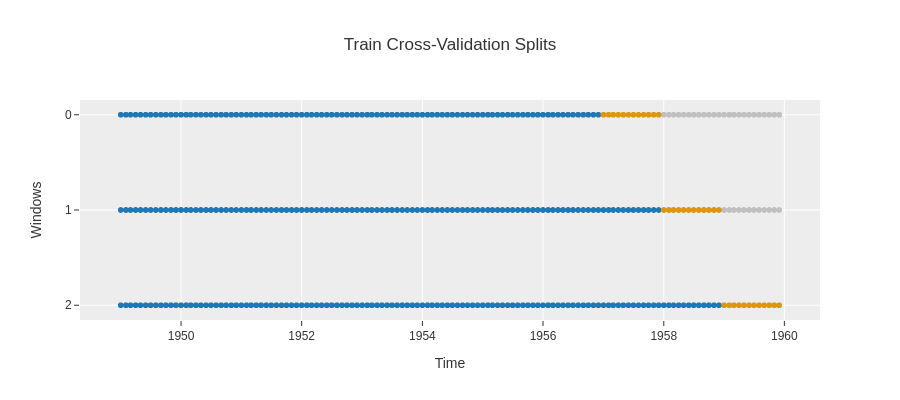

In [ ]:
eda.plot_model(plot="train_test_split", fig_kwargs={"height": 400, "width": 900})

eda.plot_model(plot="cv", fig_kwargs={"height": 400, "width": 900})

# Statistical Tests


In [ ]:
# Summary Statistics
eda.check_stats(test="summary")

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.000000
1,Summary,Statistics,Transformed,# Missing Values,,0.000000
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.500000
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.583160
8,Summary,Statistics,Transformed,# Distinct Values,,118.000000


In [ ]:
eda.check_stats(test='stationarity')

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,ADF,Transformed,Stationarity,{'alpha': 0.05},False
1,Stationarity,ADF,Transformed,p-value,{'alpha': 0.05},0.99188
2,Stationarity,ADF,Transformed,Test Statistic,{'alpha': 0.05},0.815369
3,Stationarity,ADF,Transformed,Critical Value 1%,{'alpha': 0.05},-3.481682
4,Stationarity,ADF,Transformed,Critical Value 5%,{'alpha': 0.05},-2.884042
5,Stationarity,ADF,Transformed,Critical Value 10%,{'alpha': 0.05},-2.57877
6,Stationarity,KPSS,Transformed,Trend Stationarity,{'alpha': 0.05},True
7,Stationarity,KPSS,Transformed,p-value,{'alpha': 0.05},0.1
8,Stationarity,KPSS,Transformed,Test Statistic,{'alpha': 0.05},0.09615
9,Stationarity,KPSS,Transformed,Critical Value 10%,{'alpha': 0.05},0.119


In [ ]:
eda.check_stats(test='white_noise')

,Test,Test Name,Data,Property,Setting,Value
0,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817
1,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 48}",1933.155822
2,White Noise,Ljung-Box,Transformed,p-value,"{'alpha': 0.05, 'K': 24}",0.000000
3,White Noise,Ljung-Box,Transformed,p-value,"{'alpha': 0.05, 'K': 48}",0.000000
4,White Noise,Ljung-Box,Transformed,White Noise,"{'alpha': 0.05, 'K': 24}",0.000000
5,White Noise,Ljung-Box,Transformed,White Noise,"{'alpha': 0.05, 'K': 48}",0.000000


In [ ]:
eda.check_stats(test='kpss', alpha = 0.2)

,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,KPSS,Transformed,Trend Stationarity,{'alpha': 0.2},False
1,Stationarity,KPSS,Transformed,p-value,{'alpha': 0.2},0.1
2,Stationarity,KPSS,Transformed,Test Statistic,{'alpha': 0.2},0.09615
3,Stationarity,KPSS,Transformed,Critical Value 10%,{'alpha': 0.2},0.119
4,Stationarity,KPSS,Transformed,Critical Value 5%,{'alpha': 0.2},0.146
5,Stationarity,KPSS,Transformed,Critical Value 2.5%,{'alpha': 0.2},0.176
6,Stationarity,KPSS,Transformed,Critical Value 1%,{'alpha': 0.2},0.216


In [ ]:
eda.check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,280.298611
3,Summary,Statistics,Transformed,Median,,265.5
4,Summary,Statistics,Transformed,Standard Deviation,,119.966317
5,Summary,Statistics,Transformed,Variance,,14391.917201
6,Summary,Statistics,Transformed,Kurtosis,,-0.364942
7,Summary,Statistics,Transformed,Skewness,,0.58316
8,Summary,Statistics,Transformed,# Distinct Values,,118.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",1606.083817
